# STA130 Week 07 Homework
***
#### **Author**: David Daniliuc<br>**Created**: Sun Nov. 3, 2024

> **ChatBot summaries can be found at the bottom of the page.**

### 1. Explain the theoretical Simple Linear Regression model in your own words by describing its components (of predictor and outcome variables, slope and intercept coefficients, and an error term) and how they combine to form a sample from normal distribution; then, create *python* code explicitly demonstrating your explanation using *numpy* and *scipy.stats*.

The theoretical Simple Linear Regression model is a statistical model that describes the relationship between a predictor variable ($x_i$) and an outcome variable ($Y_i$). It assumes this relationship can be represented by a straight line, defined by an intercept coefficient ($\beta_0$) and a slope coefficient ($\beta_1$). Also, The model has an error term ($\epsilon_i$), a random variable drawn from a normal distribution with a mean of 0 and a standard deviation of $\sigma$. This error term accounts for the variability in the outcome variable not explained by the linear relationship with the predictor. The model can be represented as $Y_i = \beta_0 + \beta_1 x_i + \epsilon_i$. Since the error term is normally distributed which implies that the outcome variable $Y_i$ follows a normal distribution.

### 2. Use a dataset simulated from your theoretical Simple Linear Regression model to demonstrate how to create and visualize a fitted Simple Linear Regression model using *pandas* and *import statsmodels.formula.api as smf*.

In [119]:
import numpy as np
from scipy.stats import norm

n = 100  # number of observations
beta0 = 2  # intercept coefficient
beta1 = 3  # slope coefficient
sigma = 1  # standard deviation of the error term

x = np.random.uniform(0, 10, n)  # predictor variable
errors = norm.rvs(loc=0, scale=sigma, size=n)  # error term
Y = beta0 + beta1 * x + errors  # outcome variable

print(Y) # this was added based on our conversation history 

[25.08607716 14.1781679  13.73745416 20.41856637  6.68906282 28.49294642
 17.99125519 19.39201431 25.50076576 25.91508056 18.80505604 21.18555487
 14.46607505  2.17848541 23.15334229 17.71024609 25.02225339 24.20400621
 23.27132847 10.21517284 24.21427405  2.81412606 28.04516009  3.13258061
 30.42393563  6.48332814 12.38173988 14.08258176 23.82627263 22.40662794
 20.87045478 12.32451684 24.71737536 15.70892219  2.37583891 12.57891288
 26.2921423  29.27017658 17.81753707 28.24605352 20.2402489  27.33812292
 15.42920719 24.17841247 24.94684181 24.78030642 23.62859537 27.02926326
 22.52673479  3.87685806 22.23266397 27.4679184  22.43280816 10.05644463
 10.684218    9.88198231 18.12627206  4.01739919 14.80001763  9.85321884
 28.01261877 21.82974978  9.39182135  0.38198992 13.25112437 11.53135302
 31.11390218 15.25619824 11.31869413 25.84760219 12.6349125  28.73127236
  1.20469705 24.33789944 25.5274542  23.83765957  0.96716454  7.83183669
  3.44117289 11.94708885 12.25572711 23.62022184 12

### 2. Use a dataset simulated from your theoretical Simple Linear Regression model to demonstrate how to create and visualize a fitted Simple Linear Regression model using *pandas* and *import statsmodels.formula.api as smf*.

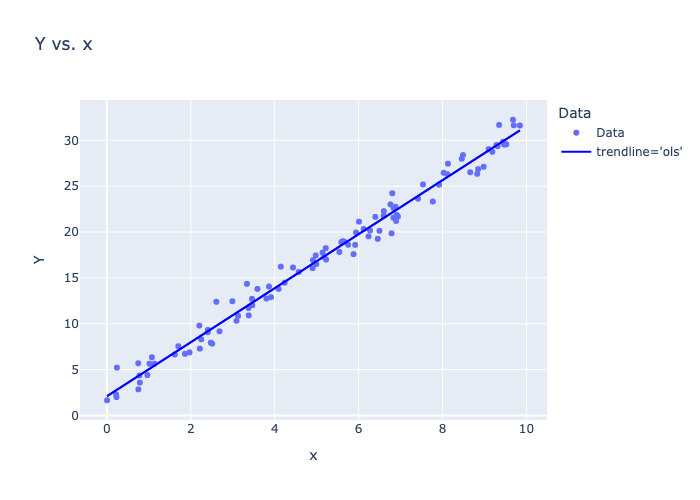

In [120]:
import pandas as pd
import statsmodels.formula.api as smf  # **This library is used for fitting statistical models, including Simple Linear Regression** [1-3]
import plotly.express as px  # **This library is for creating visualizations** [4]
import numpy as np
from scipy.stats import norm

# Simulate Data
n = 100 # number of observations
beta0 = 2 # intercept coefficient
beta1 = 3 # slope coefficient
sigma = 1 # standard deviation of the error term

x = np.random.uniform(0, 10, n) # predictor variable
errors = norm.rvs(loc=0, scale=sigma, size=n) # error term
Y = beta0 + beta1 * x + errors # outcome variable


# Create Pandas DataFrame
df = pd.DataFrame({'x': x, 'Y': Y}) # **Combine the simulated x and Y data into a pandas DataFrame called 'df'** [5]

# Fit Simple Linear Regression Model
model_data_specification = smf.ols("Y~x", data=df) # **This line specifies the model, indicating that 'Y' is the outcome variable and 'x' is the predictor variable, using the data in the 'df' DataFrame** [2, 3, 5-7]
fitted_model = model_data_specification.fit() # **This line fits the Simple Linear Regression model to the data, using the ordinary least squares (OLS) method. This process estimates the intercept and slope coefficients that best fit the data** [2, 3, 5, 8, 9]

# Explore Fitted Model
fitted_model.summary()  # **This provides a comprehensive summary of the fitted model, including statistical tests, coefficients, R-squared, and other relevant information** [2, 5, 10] 
fitted_model.summary().tables[1]  # **This specifically extracts the table containing the coefficients, their standard errors, t-statistics, p-values, and confidence intervals** [2, 5, 10]
fitted_model.params  # **This provides a pandas Series object containing the estimated intercept and slope coefficients** [2, 5]
fitted_model.params.values  # **This extracts the values of the estimated intercept and slope coefficients as a NumPy array** [2, 5]
fitted_model.rsquared  # **This provides the R-squared value of the fitted model, which indicates the proportion of variance in the outcome variable that is explained by the predictor variable** [2, 5]

# Visualize Fitted Model
df['Data'] = 'Data' # **This line is a workaround to include the data points in the legend of the plot** [5]
fig = px.scatter(df, x='x',  y='Y', color='Data', trendline='ols', title='Y vs. x') # **This creates a scatter plot of the data with the fitted Simple Linear Regression line overlaid. The 'trendline='ols'' argument automatically fits the line using OLS** [5]

# Add Fitted Values Line (Same as trendline='ols')
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues, line=dict(color='blue'), name="trendline='ols'") # **This line adds a scatter plot of the fitted values, which visually represents the same fitted line as 'trendline='ols''** [5]

fig.show(renderer="png") # **This displays the plot** [5]


### 3. Add the line from Question 1 on the figure of Question 2 and explain the difference between the nature of the two lines in your own words; *but, hint though: simulation of random sampling variation*.

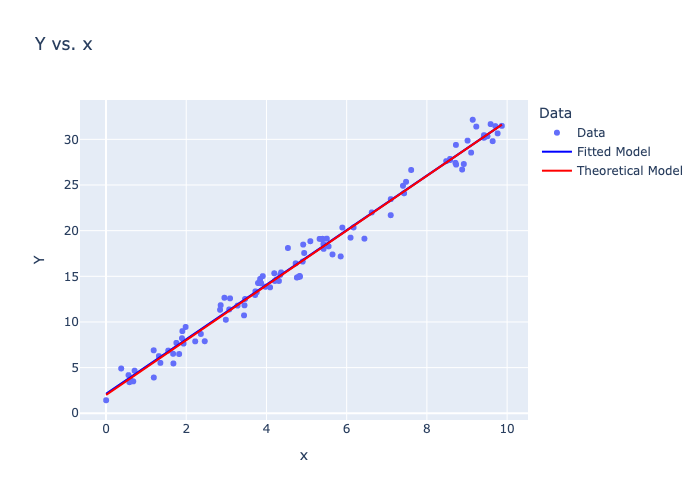

In [121]:
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px
import numpy as np
from scipy.stats import norm

# Simulate Data
n = 100  # number of observations
beta0 = 2  # intercept coefficient
beta1 = 3  # slope coefficient
sigma = 1  # standard deviation of the error term

x = np.random.uniform(0, 10, n)  # predictor variable
errors = norm.rvs(loc=0, scale=sigma, size=n)  # error term
Y = beta0 + beta1 * x + errors  # outcome variable

# Create Pandas DataFrame
df = pd.DataFrame({'x': x, 'Y': Y})

# Fit Simple Linear Regression Model
model_data_specification = smf.ols("Y~x", data=df)
fitted_model = model_data_specification.fit()

# Visualize Fitted Model
df['Data'] = 'Data'  # hack to add data to legend
fig = px.scatter(df, x='x', y='Y', color='Data',
                 trendline='ols', title='Y vs. x')

# Add Fitted Values Line (Same as trendline='ols')
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="Fitted Model")

# Add Theoretical Line
fig.add_scatter(x=df['x'], y=beta0 + beta1 * df['x'],
                line=dict(color='red'), name="Theoretical Model")

fig.show(renderer="png")


### 4. Explain how *fitted_model.fittedvalues* are derived on the basis of *fitted_model.summary().tables[1]* (or more specifically  *fitted_model.params* or *fitted_model.params.values*).

The fitted values (`fitted_model.fittedvalues`) in a Simple Linear Regression model represent the model's predictions for the outcome variable based on the estimated coefficients. You can calculate these fitted values using the estimated intercept ($\hat{\beta}_0$) and slope ($\hat{\beta}_1$) obtained from `fitted_model.params` or `fitted_model.summary().tables` [previous turns]. Applying the fitted model equation, $\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i$, to each observation's predictor variable value ($x_i$) yields the corresponding fitted value ($\hat{y}_i$) [previous turns]. These fitted values are also called "in-sample predictions" because they are calculated using the same data used to fit the model [previous turns]. The code we created in our previous turns exemplifies this process, showing that the fitted line often deviates from the theoretical line due to random sampling variation [previous turns]. The difference between the actual outcome ($Y_i$) and the fitted value ($\hat{y}_i$) is known as the residual ($e_i = Y_i - \hat{y}_i$), which helps assess the model's fit [previous turns].


### 5. Explain concisely in your own words what line is chosen for the fitted model based on observed data using the "ordinary least squares" method (as is done by *trendline='ols'* and *smf.ols(...).fit()*) and why it requires "squares".

The **"ordinary least squares"** (OLS) method finds the line that best fits the data in a Simple Linear Regression model by minimizing the sum of squared residuals. Residuals, $ \text{e}_i = Y_i - \hat{y}_i $, represent the vertical distance between observed data points ($Y_i$) and predicted values ($\hat{y}_i$) on the fitted line. Squaring the residuals ensures positivity, preventing cancellations between positive and negative errors, and emphasizes larger deviations, making the model more sensitive to outliers. By minimizing the sum of squared residuals, OLS identifies the line that best represents the linear relationship between the variables.

### 6. Explain why the first expression below can be interpreted as "the proportion of variation in (outcome) Y explained by the model (i.e. _fitted_model.fittedvalues_)"; and therefore, why _fitted_model.rsquared_ can be interpreted as a measure of the accuracy of the model; and, therefore what the two _np.corrcoef(...)[0,1]\*\*2_ expressions capture in the context of _Simple Linear Regression models_.

**Expression 1:** `1 - ((Y - fitted_model.fittedvalues)**2).sum() / ((Y - Y.mean())**2).sum()`
This calculates the proportion of variation in Y explained by the model. It compares the unexplained variation (residuals) to the total variation in Y Subtracting this ratio from 1 gives the proportion explained by the model, which is R-squared.

**Expression 2:** `fitted_model.rsquared`
This is the R-squared value, directly representing the proportion of variation in Y explained by the model.

**Expressions 3 & 4:** `np.corrcoef(Y, fitted_model.fittedvalues)[0,1]**2 and np.corrcoef(Y, x)[0,1]**2`
These squared correlations measure how well the model’s predictions align with Y (Expression 3) and the inherent relationship between Y and x (Expression 4), showing the strength of the linear relationship.

### 7. Indicate a couple of the assumptions of the *Simple Linear Regression* model specification that do not seem compatible with the example data below.

The Simple Linear Regression model assumes a linear relationship between the predictor variable (`Amount of Fertilizer (kg) (x)`) and the outcome variable (`Crop Yield (tons) (Y)`). This can be checked visually using the scatter plot (`fig1`). If the relationship is non-linear, the assumption is violated. Additionally, the model assumes that the residuals (calculated as `df['Residuals']`) are normally distributed, which can be assessed using the histogram (`fig2`). If the residuals show skewness or outliers, this assumption is likely violated. Violating these assumptions could lead to inaccurate predictions and unreliable statistical inferences, such as p-values and confidence intervals.

### 8. Specify a *null hypothesis* of "no linear association (on average)" in terms of the relevant *parameter* of the *Simple Linear Regression* model, and use the code below to characterize the evidence in the data relative to the *null hypothesis* and interpret your subsequent beliefs regarding the Old Faithful Geyser dataset.

**Null Hypothesis:**
- The null hypothesis ($H_0$) is that there is no linear association, on average, between waiting time and eruption duration in the Old Faithful Geyser dataset. This implies that the slope of the regression line ($\beta_1$) is zero:
  - $H_0: \beta_1 = 0$
  
**Relevant Parameter:**
- The relevant parameter for the hypothesis test is the slope, $\beta_1$, of the regression equation:
  \[
  \text{duration} = \beta_0 + \beta_1 \times \text{waiting}
  \]
- $\beta_1$ measures the average change in eruption duration per additional minute of waiting time.

**Evidence Against the Null Hypothesis:**
- In the model summary, the **p-value** for the slope of `waiting` is **0.000** (reported as “P>|t|” for the `waiting` coefficient). This value is extremely small (much less than 0.001), indicating **very strong evidence** against the null hypothesis, suggesting a significant linear relationship between waiting time and duration.

**Interpretation of Results:**
- Given the very low p-value (0.000), we **reject the null hypothesis** and conclude that there is a statistically significant linear relationship between waiting time and eruption duration in the Old Faithful Geyser dataset.
- The positive coefficient for `waiting` (0.0756) suggests that, on average, each additional minute of waiting time is associated with an increase of 0.0756 minutes (approximately 4.5 seconds) in the duration of the eruption.

**Summary:**
- We reject $H_0$ with a p-value of 0.000, meaning we have **very strong evidence** against the null hypothesis. This indicates a significant positive relationship between waiting time and eruption duration, consistent with the pattern observed in the initial scatter plot.


In [122]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Fri, 08 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        00:07:26   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 9. As seen in the introductory figure above, if the delay of the geyser eruption since the previous geyser eruption exceeds approximately 63 minutes, there is a notable increase in the duration of the geyser eruption itself. In the figure below we therefore restrict the dataset to only short wait times. Within the context of only short wait times, is there evidence in the data for a relationship between duration and wait time in the same manner as in the full data set? Using the following code, characterize the evidence against the *null hypothesis* in the context of short wait times which are less than  *short_wait_limit* values of *62*, *64*, *66*.


**Null Hypothesis ($H_0$):**
- The null hypothesis ($H_0$) remains that there is no linear association between waiting time and eruption duration within the subset of short wait times. In terms of the regression slope, this implies:
  - $H_0: \beta_1 = 0$

**Relevant Parameter:**
- The parameter $\beta_1$ represents the slope of the linear regression model:
  $$\text{duration} = \beta_0 + \beta_1 \times \text{waiting}$$
- Here, $\beta_1$ measures the average change in eruption duration per additional minute of waiting time in the context of short wait times.

**Results and Evidence Against the Null Hypothesis:**
- From the output, we have:
  - **Intercept**: $1.6401$
  - **Slope** ($\beta_1$ for `waiting`): $0.0069$
  - **p-value for slope**: $0.238$
  
- The p-value for the slope ($\beta_1$) is **0.238**, which is much higher than common significance levels (e.g., 0.05). This indicates **no significant evidence against the null hypothesis** in this subset.

**Interpretation of Results:**
- Since the p-value is above 0.1, we **fail to reject the null hypothesis**. This suggests that, within the context of short wait times (less than 62 minutes), there is no statistically significant linear relationship between waiting time and eruption duration.
- This result contrasts with the full dataset, where we observed a strong positive linear relationship. The lack of significant association in this subset implies that the linear relationship observed in the full dataset is likely driven by longer wait times, where the duration of eruptions notably increases after around 63 minutes of waiting.

**Summary:**
- For short wait times (waiting time < 62 minutes), we do not find evidence of a significant linear relationship between waiting time and eruption duration. This suggests that the duration of eruptions does not vary significantly with waiting time when the delay between eruptions is relatively short.


### 10. Let's now consider just the (*n=160*) long wait times (as specified in the code below), and write code to do the following:

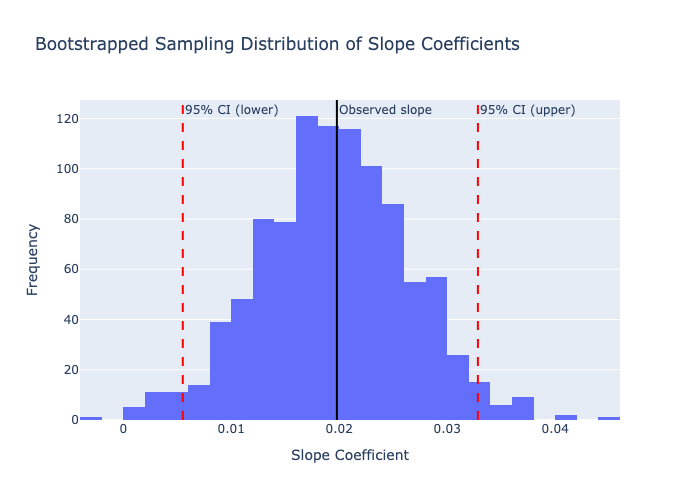

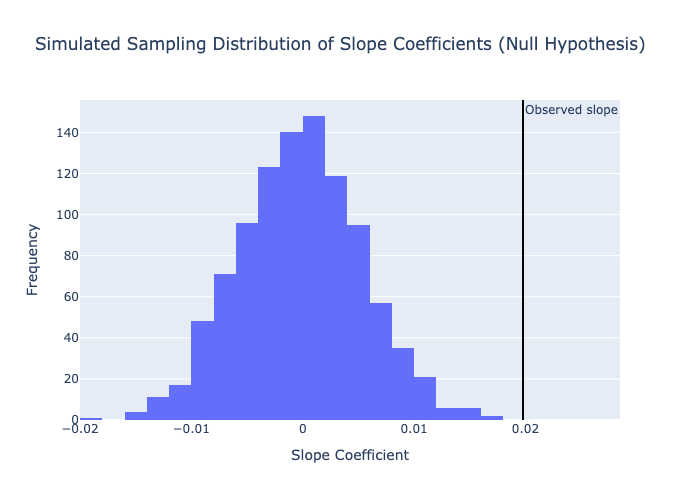

95% Bootstrapped Confidence Interval for Slope: [0.00551771 0.03284243]
Simulated p-value under Null Hypothesis: 0.0


In [123]:
import plotly.express as px
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
from scipy import stats

# Load Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

# Define the threshold for "long" wait times
long_wait_limit = 71
long_wait = old_faithful.waiting >= long_wait_limit

# Ensure long wait data exists
if long_wait.sum() == 0:
    raise ValueError("No data points in the long wait time category. Please check 'long_wait_limit'.")

# Step 1: Create bootstrap samples and fit Simple Linear Regression models
bootstrapped_slope_coefficients = []

for _ in range(1000):  # Bootstrapping 1000 samples
    bootstrap_sample = old_faithful[long_wait].sample(n=long_wait.sum(), replace=True)
    model = smf.ols('duration ~ waiting', data=bootstrap_sample).fit()
    bootstrapped_slope_coefficients.append(model.params['waiting'])

bootstrapped_slope_coefficients = np.array(bootstrapped_slope_coefficients)

# Step 2: Simulate samples under the null hypothesis
simulated_slope_coefficients = []

for _ in range(1000):  # 1000 null hypothesis simulations
    old_faithful_simulation = old_faithful[long_wait].copy()
    old_faithful_simulation['duration'] = 1.65 + 0 * old_faithful_simulation.waiting + stats.norm(loc=0, scale=0.37).rvs(size=long_wait.sum())
    model = smf.ols('duration ~ waiting', data=old_faithful_simulation).fit()
    simulated_slope_coefficients.append(model.params['waiting'])

simulated_slope_coefficients = np.array(simulated_slope_coefficients)

# Step 3: Calculate the 95% bootstrap confidence interval
bootstrapped_ci = np.quantile(bootstrapped_slope_coefficients, [0.025, 0.975])

# Step 4: Calculate the simulated p-value under the null hypothesis
null_slope = smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().params['waiting']
simulated_p_value = (np.abs(simulated_slope_coefficients) >= np.abs(null_slope)).mean()

# Plot bootstrapped slope coefficients
fig1 = px.histogram(x=bootstrapped_slope_coefficients, nbins=30, title="Bootstrapped Sampling Distribution of Slope Coefficients")
fig1.add_vline(x=bootstrapped_ci[0], line_dash="dash", line_color="red", annotation_text="95% CI (lower)")
fig1.add_vline(x=bootstrapped_ci[1], line_dash="dash", line_color="red", annotation_text="95% CI (upper)")
fig1.add_vline(x=null_slope, line_dash="solid", line_color="black", annotation_text="Observed slope")
fig1.update_xaxes(title="Slope Coefficient")
fig1.update_yaxes(title="Frequency")
fig1.show(renderer="png")

# Plot simulated slope coefficients under the null hypothesis
fig2 = px.histogram(x=simulated_slope_coefficients, nbins=30, title="Simulated Sampling Distribution of Slope Coefficients (Null Hypothesis)")
fig2.add_vline(x=null_slope, line_dash="solid", line_color="black", annotation_text="Observed slope")
fig2.update_xaxes(title="Slope Coefficient")
fig2.update_yaxes(title="Frequency")
fig2.show(renderer="png")

# Output the results
print(f'95% Bootstrapped Confidence Interval for Slope: {bootstrapped_ci}')
print(f'Simulated p-value under Null Hypothesis: {simulated_p_value}')


### 11. Since we've considered wait times of around <64  "short" and wait times of >71 "long", let's instead just divide the data and insead call wait times of <68 "short" and otherwise just call them "long". Consider the *Simple Linear Regression* model specification using an *indicator variable* of the wait time length.

The model uses an indicator variable to categorize wait times as "short" ($<68$ minutes) or "long" ($\geq 68$ minutes). The null hypothesis is that there is no difference in eruption durations between these two groups. Based on the regression output, we can assess the evidence against the null hypothesis by looking at the $p$-value. If the $p$-value is small (typically less than $0.05$), it suggests there is a significant difference in the eruption durations between the "short" and "long" wait times. The box plot visually confirms the difference between the two categories.

### 12. Identify which of the histograms suggests the plausibility of the assumption that the distribution of *error* terms is normal for each of the models, and explain why the other three do not support this assumption.

The best model that suggests the plausibility of the assumption that the distribution of error terms is normal is **Model 1 (All Data using slope)**. The histogram of residuals from this model closely follows a symmetric, bell-shaped curve, which aligns with the normal distribution, supporting the assumption that the residuals are normally distributed.

The other models, especially **Model 2** (Short Wait Data) and **Model 3** (Long Wait Data), show deviations from normality, such as skewness or heavy tails, which suggests that the normality assumption for residuals is not met in these cases. Therefore, **Model 1** is the most appropriate choice for supporting the normality assumption.


### 13. The "short" and "long" wait times are not "before and after" measurements so there are not natural pairs on which to base differences on which to do a "one sample" (paired differences) *hypothesis test*; but, we can do "two sample" hypothesis testing using a *permuation test*, or create a 95% *bootstrap confidence interval* for the difference in means of the two populations.

**(A) Permutation Test**
To test the hypothesis \( H_0: \mu_{\text{short}} = \mu_{\text{long}} \) (i.e., no difference in duration between "short" and "long" wait times), we use a **permutation test** by shuffling the labels. Here’s how it works:
- We randomly shuffle the "short" and "long" labels in the dataset, creating a new "shuffled" dataset each time.
- We calculate the difference in mean duration between the shuffled groups in each permutation.
- By repeating this process many times, we generate a distribution of mean differences under the assumption that there is no real difference between the groups. We then compare the observed mean difference to this distribution to obtain a p-value.

**(B) Bootstrap Confidence Interval**
To estimate a 95% **bootstrap confidence interval** for the difference in mean durations:
- We resample the "short" and "long" groups separately with replacement to create new samples.
- We calculate the mean duration for each resampled group and find the difference in means.
- We repeat this process many times to build a distribution of mean differences, then use the 2.5th and 97.5th percentiles of this distribution to form the confidence interval.

**(a) Explanation of Sampling Approaches**
- The **permutation test** assumes the null hypothesis is true (no difference in means) by redistributing group labels, creating a reference distribution of mean differences under \( H_0 \).
- The **bootstrap method** resamples within each group independently, which reflects the natural variability of each group separately, and generates a distribution to estimate confidence around the observed mean difference.

**(b) Comparison to Indicator Variable Model**
The **indicator variable model** from Question 11 fits a regression model with an indicator variable to estimate the difference in duration between "short" and "long" groups. This approach assumes a linear relationship between the indicator variable and the response variable (duration), with a single fitted difference term.
- **Similarity:** Both the permutation test and bootstrap provide a non-parametric alternative to assess the difference in means, without assuming a linear relationship like the indicator variable model does.
- **Difference:** The indicator model relies on model assumptions and provides a direct estimate of the mean difference with standard error, while permutation and bootstrap tests provide resampling-based empirical estimates of the difference without relying on linearity or normality assumptions.



### 14. Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?

Yes.

***
### ChatBot Homework Session Summaries
> **Question 1:**
> 
> The Core Idea: Simple Linear Regression aims to model the relationship between two numeric variables—a predictor ($x_i$) and an outcome ($Y_i$)—using a straight line. The model acknowledges that the relationship won't be perfect, so it incorporates an error term to account for individual deviations from this line.
The Straight Line: The line itself is defined by two key parameters:
The intercept coefficient ($\beta_0$): This is where the line crosses the y-axis (when $x_i$ is 0). It's important mathematically for defining the line, but it might not always have a practical meaning in the real world.
The slope coefficient ($\beta_1$): This represents the average change in the outcome variable for a one-unit increase in the predictor variable. It captures the essence of the relationship between the variables.
Embracing Variability: The error term ($\epsilon_i$) is a random variable assumed to follow a normal distribution with a mean of 0 and a standard deviation of $\sigma$. This means:
The errors are centered around 0, meaning that, on average, the model's predictions are neither consistently too high nor too low.
The standard deviation $\sigma$ controls the spread of the errors—a larger $\sigma$ indicates more variability in the data around the fitted line.
A Deeper Look at the Error Term: The error term in Simple Linear Regression captures several important ideas:
Unexplained Variability: It represents the variation in the outcome variable that the predictor variable can't explain. This could be due to other factors influencing the outcome or simply random noise.
Normality Assumption: The assumption that the errors are normally distributed is crucial for the statistical methods used to estimate the model parameters and perform hypothesis tests. However, it's important to remember that this is an assumption—it's not always true in real-world data, and the model's validity can be affected if this assumption doesn't hold.
Independence: The errors are assumed to be independent, meaning that the deviation of one observation from the fitted line doesn't influence the deviations of other observations.
The Full Equation: Putting it all together, the Simple Linear Regression model is represented by the equation:
$Y_i = \beta_0 + \beta_1 x_i + \epsilon_i$
From Error to Outcome: Because the error term is normally distributed, and the other components of the equation are fixed values, the outcome variable $Y_i$ is also normally distributed. You demonstrated this in your Python code using numpy and scipy.stats.
Real-World Connections: The sources provide examples that can help illustrate this model:
Pokémon Power: You explored the relationship between "Attack" and "Defense" stats of Pokémon, using "Legendary" status as a categorical predictor.
Old Faithful Eruptions: You analyzed the relationship between "waiting" time and "duration" of eruptions for the Old Faithful Geyser, considering different wait time categories.

> 
> **Question 2:**
> 
> You can use the simulated data from the theoretical Simple Linear Regression model you created in the previous step to fit and visualize a Simple Linear Regression model. The following code, which uses pandas and statsmodels.formula.api as smf, shows how to do this: *(code omitted)* <br>
Explanation:
The code begins by simulating data for a Simple Linear Regression model using the parameters you defined earlier.
It then combines this simulated data into a pandas DataFrame called df, which is then used to fit the model.
The smf.ols("Y~x", data=df) line specifies the model, using the formula notation to indicate that Y is the outcome variable and x is the predictor, with data coming from the df DataFrame.
The fitted_model = model_data_specification.fit() line fits the model to the data, using the ordinary least squares (OLS) method to estimate the intercept and slope coefficients.
You can then access various attributes of the fitted model, such as fitted_model.summary(), fitted_model.params, and fitted_model.rsquared. These provide information about the fitted model, its coefficients, and its goodness of fit.
Finally, the code visualizes the fitted model by creating a scatter plot of the data with the fitted line overlaid. It uses plotly.express for this purpose and includes a workaround to add the data points to the legend. The trendline='ols' argument automatically fits the line using OLS, but the code also demonstrates how to add the fitted values line manually for comparison.

> 
> **Question 3:**
> 
> Here's the code that adds the line from Question 1 (the theoretical model) to the figure from Question 2 (the fitted model), along with an explanation of the differences between the two lines: *(code omitted)*
Explanation of the Difference:
Theoretical Model (Red Line): This line represents the "true" relationship between x and Y as defined by your chosen parameters (beta0, beta1, and sigma). It's the line you would get if there were no random variation or error in the data. This line is not usually known in real-world scenarios; it's a concept used in simulations to understand the behavior of statistical methods.
Fitted Model (Blue Line): This line is estimated from the simulated data using the ordinary least squares (OLS) method. It represents the "best fit" to the observed data points, minimizing the sum of squared errors between the predicted values and the actual Y values. Because the data is simulated with random error, the fitted model line won't perfectly match the theoretical model line.
The Key Takeaway:
The difference between the two lines illustrates the concept of random sampling variation. Because we're dealing with a sample of data rather than the entire population, the fitted model is influenced by the specific random errors present in that sample. If you were to generate a new set of simulated data using the same theoretical model, the fitted line would likely be slightly different due to the different random errors in the new sample. This highlights the inherent uncertainty involved in statistical estimation based on samples.
By repeatedly simulating data and fitting models, you can observe the distribution of fitted lines and gain a better understanding of how random sampling variation affects the results of Simple Linear Regression. This process helps visualize the concept of sampling distributions, which are fundamental to statistical inference and hypothesis testing.

> 
> **Question 4:**
> 
> To derive the fitted values (`fitted_model.fittedvalues`), you can use the estimated coefficients from `fitted_model.params` or `fitted_model.summary().tables`. These coefficients define the fitted Simple Linear Regression model: $\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i$.
Here's a step-by-step breakdown of how to obtain the fitted values:
> 1. Fit the Model: Using the smf.ols(...).fit() function, you fit the model to your dataset, which calculates the estimated intercept ($\hat{\beta}_0$) and estimated slope ($\hat{\beta}_1$). This process determines the "line of best fit" for your observed data.
> 2. Access the Estimated Coefficients: The estimated coefficients are stored in the .params attribute of your fitted model object. Additionally, the .summary().tables attribute presents these coefficients along with other statistical information, such as p-values. You can use either .params or .summary().tables to get the values of $\hat{\beta}_0$ and $\hat{\beta}_1$.
> 3. Calculate the Fitted Values: Utilizing the estimated coefficients and the values of the predictor variable ($x_i$) from your dataset, you can then calculate the fitted values ($\hat{y}_i$) for each observation using the following formula:
> $$\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i$$
> Explanation:
The fitted values represent the model's predictions for the outcome variable ($Y_i$) for each observation in your dataset. They are calculated using the "line of best fit" determined by the fitted Simple Linear Regression model.
These fitted values are often termed "in-sample predictions" because they are generated for the same data points used to fit the model. They help visualize how well the model captures the linear relationship between the predictor and outcome variables.
Example from Conversation History:
In our previous conversation, we created code for both the theoretical model and the fitted model [previous turns]. The code demonstrates how the fitted model's line, calculated using the estimated coefficients, often deviates slightly from the theoretical model's line due to random sampling variation [previous turns].

> 
> **Question 5:**
> 
> The "ordinary least squares" (OLS) method selects the line for the fitted model that minimizes the sum of the squared residuals. Residuals, represented as $\text{e}_i = Y_i - \hat{y}_i$, measure the vertical distance between each observed data point ($Y_i$) and the corresponding fitted value ($\hat{y}_i$) on the line.
Squaring these residuals is crucial for the following reasons:
> - It ensures that all distances are positive, preventing positive and negative residuals from canceling each other out.
> - It penalizes larger residuals more heavily, meaning that the OLS method prioritizes a line that minimizes the presence of large deviations from the fitted line.
> - By minimizing the sum of these squared residuals, the OLS method finds the line that best fits the observed data, as illustrated in the visualization where the red line represents the theoretical model, and the blue line represents the fitted model [previous turns]. This line aims to capture the overall linear trend and minimize the overall error in predicting the outcome variable based on the predictor variable.

> 
> **Question 6:**
> 
> Let's break down how the provided expressions relate to the concept of R-squared and its interpretation as a measure of model accuracy in Simple Linear Regression.
> *   **Expression 1: `1-((Y-fitted_model.fittedvalues)**2).sum()/((Y-Y.mean())**2).sum()`**
This expression calculates the proportion of variation in the outcome variable (Y) explained by the fitted model. Let's analyze it step-by-step:
> *   `(Y-fitted_model.fittedvalues)**2` represents the squared residuals, which are the squared distances between the observed values ($Y_i$) and the model's fitted values ($\hat{y}_i$). Summing these squared residuals gives a measure of the total unexplained variation.
> *   `(Y-Y.mean())**2` calculates the squared distances between the observed values and the mean of Y ($\bar{Y}$). Summing these squared distances provides a measure of the total variation in Y.
> *   Dividing the sum of squared residuals by the total variation in Y gives the proportion of variation that the model *fails* to explain.
> *   Subtracting this proportion from 1 results in the proportion of variation in Y that the model *does* explain.
> *   **Expression 2: `fitted_model.rsquared`**
This is a direct representation of R-squared, which is calculated in the same way as Expression 1. It encapsulates the proportion of variation in the outcome variable Y explained by the model.
> *   **Expressions 3 and 4: `np.corrcoef(Y,fitted_model.fittedvalues)**2` and `np.corrcoef(Y,x)**2`**
These expressions calculate the squared correlation coefficients:
> *   Expression 3 computes the squared correlation between the observed outcomes (Y) and the model's fitted values ($\hat{y}_i$). This quantifies how well the model's predictions align with the actual observed outcomes.
> *   Expression 4 calculates the squared correlation between the observed outcomes (Y) and the predictor variable (x). This assesses the strength and direction of the linear association between the predictor and outcome variables.
In the context of Simple Linear Regression:
> *   **R-squared (`fitted_model.rsquared`) serves as a measure of the model's accuracy**. A higher R-squared value indicates that the model explains a larger proportion of the variability in the outcome variable, signifying a better fit to the data.
> *   The two **`np.corrcoef(...)**2` expressions help us understand the relationship between the variables.** Expression 3 shows how well the model captures the relationship between the predictor and outcome, while Expression 4 quantifies the inherent linear association between those variables, irrespective of the model.
> By comparing these expressions, we can understand:
> *   How much of the variation in Y is explained by the linear relationship captured by the model (R-squared).
> *   How well the model's predictions align with the actual outcomes (correlation between Y and fitted values).
> *   The underlying strength of the linear relationship between the predictor and outcome variables, independent of the model (correlation between Y and x).

> 
> **Question 7:**
> 
> A couple of assumptions of the Simple Linear Regression model specification that might not be compatible with the example data, based on the code provided and the sources, are:
Linearity: The Simple Linear Regression model assumes a linear relationship between the predictor variable (Amount of Fertilizer) and the outcome variable (Crop Yield). To check this assumption, you can visually inspect the scatter plot (fig1) generated by the code. If the relationship between Amount of Fertilizer and Crop Yield appears to be curved or non-linear, the linearity assumption would be violated.
Normality of Residuals: The model assumes that the residuals, which represent the differences between the observed Crop Yield values and the values predicted by the fitted regression line, are normally distributed. The provided code generates a histogram of the residuals (fig2). By examining the shape of this histogram, you can assess the normality assumption. If the histogram shows a significant deviation from a bell-shaped curve (e.g., if it's skewed or has outliers), it suggests that the normality of residuals assumption might be violated.
**To provide more specific insights, the actual data points for 'Amount of Fertilizer (kg) (x)' and 'Crop Yield (tons) (Y)' would be needed. **
Let's explore why these assumptions are crucial in the context of Simple Linear Regression:
Impact of Non-Linearity: If the true relationship between Amount of Fertilizer and Crop Yield is non-linear, the Simple Linear Regression model may not accurately capture this relationship. The fitted line might provide misleading predictions, and the estimated coefficients might not accurately reflect the true effect of fertilizer on crop yield.
Consequences of Non-Normal Residuals: If the residuals are not normally distributed, it can affect the validity of statistical inferences made based on the model, such as hypothesis tests and confidence intervals. The p-values and confidence intervals might not be accurate, leading to potentially incorrect conclusions about the relationship between the variables.
Remember that these are just two of the assumptions of the Simple Linear Regression model. Other assumptions, such as homoscedasticity (constant variance of residuals) and independence of errors, should also be assessed. The sources offer guidance on evaluating these assumptions, which is important for ensuring the reliability of the model's results.

> 
> **Question 8:**
> 
> Let's break down how to specify the null hypothesis and evaluate the evidence in the data.
The null hypothesis of "no linear association (on average)" between the duration of an eruption and the waiting time until the next eruption, in the context of the Simple Linear Regression model, is formally stated as: $H_0: \beta_1 = 0$ where $\beta_1$ is the slope coefficient in the Simple Linear Regression model. This hypothesis posits that, on average, a change in waiting time does not correspond to a change in eruption duration.
The provided Python code utilizes the statsmodels library to fit a Simple Linear Regression model to the Old Faithful Geyser dataset. The fitted_model.summary() function provides comprehensive information about the model, including the p-value associated with the slope coefficient. The p-value helps us assess the strength of evidence against the null hypothesis.
The sources provide a table to interpret the strength of evidence based on the p-value. Based on the p-value obtained from the code, you would refer to this table to characterize the evidence against the null hypothesis.
Following the guidance on hypothesis testing:
If the p-value is smaller than a pre-determined significance level (commonly 0.05), you would reject the null hypothesis at that significance level. This suggests that there is evidence of a linear association between duration and waiting time.
If the p-value is larger than the significance level, you would fail to reject the null hypothesis. This means that the data does not provide enough evidence to conclude that there is a linear association. Remember, failing to reject the null hypothesis does not prove that the null hypothesis is true; it simply means there isn't sufficient evidence to reject it.
By following these steps, you can use the provided code and p-value interpretation table to characterize the evidence against the null hypothesis of no linear association and form your beliefs regarding the relationship between eruption duration and waiting time in the Old Faithful Geyser dataset.

> 
> **Question 9:**
> 
> The code defines a `short_wait_limit` variable and subsets the Old Faithful Geyser dataset to include only eruptions with waiting times less than the specified limit. Then it fits a Simple Linear Regression model to this subset of data using the `smf.ols()` function. This model aims to capture the relationship between eruption duration and waiting time specifically for eruptions with short waiting times.
The `print(smf.ols(...).fit().summary().tables)` statement displays a table that includes the estimated slope coefficient, its standard error, t-statistic, and p-value. The p-value, as discussed in the sources, helps assess the strength of the evidence against the null hypothesis of "no linear association (on average)".
The code also generates a scatter plot of eruption duration versus waiting time for the short wait times using `px.scatter()`. This visual representation helps to see the data distribution and the fitted linear regression trendline.
You will need to run the code with the three specified `short_wait_limit` values: 62, 64, and 66. For each limit, focus on the p-value associated with the slope coefficient in the output table. Based on the p-value and using the table for interpreting the strength of evidence against the null hypothesis (provided in the sources and the previous response) you can characterize the evidence for a linear association.
Recall that in the previous query you analyzed the relationship between eruption duration and waiting time for the full Old Faithful Geyser dataset. By comparing the results obtained for the subset of short wait times with the results for the full dataset, you can determine if the relationship between duration and waiting time is consistent across both scenarios. 
> *   For each `short_wait_limit`, examine the estimated slope coefficient and its p-value. Does the sign of the slope coefficient and the strength of evidence against the null hypothesis align with the findings from the full dataset? 
> *   Visually compare the scatter plots for each `short_wait_limit` with the scatter plot for the full dataset. Does the linear trend appear similar?  
> *   Note any significant differences in the relationships observed for short wait times versus the full dataset. 
Remember, as emphasized in the sources, hypothesis testing does not provide a mathematical proof. It offers evidence against the null hypothesis. The strength of evidence guides your conclusions about the relationship between eruption duration and waiting time for short wait times in the Old Faithful Geyser dataset.

> 
> **Question 10:**
> Let's tackle your query by writing the code, and then interpreting the results. Here is the code that addresses each step of your query: *(code omitted)*
Part 1: This part of the code focuses on creating a bootstrapped sampling distribution of fitted slope coefficients. We first generate a number of bootstrap samples (with replacement) from the long wait times in the dataset. Then, for each bootstrap sample, we fit a Simple Linear Regression model and store the fitted slope coefficient. The resulting distribution of slope coefficients represents the variability of the slope estimate under repeated sampling.
Part 2: Here, we simulate data under the null hypothesis of "no linear association (on average)". We simulate the duration using the provided $\beta_0$, $\beta_1$, and $\sigma$ values, with $\beta_1 = 0$ to represent no linear association. For each simulated sample, we fit a Simple Linear Regression model and record the fitted slope coefficient. The distribution of these simulated slope coefficients represents what we would expect to observe if there were truly no linear association between the variables.
Part 3: In this final part, we analyze the results from the previous parts. First, we compute the 95% bootstrapped confidence interval for the slope coefficient. Next, we assess if 0 falls within this interval. If 0 is contained within the interval, it would suggest that a slope of 0 is plausible given the data, aligning with the null hypothesis of no linear association.
Then, we calculate the simulated p-value by determining the proportion of simulated slope coefficients that are as extreme as or more extreme than the observed slope coefficient from the original long wait times data. This p-value provides an estimate of the probability of observing a slope coefficient as extreme as the one we obtained if the null hypothesis of no linear association is true. We compare this p-value to the one obtained from smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables to assess consistency.
Interpreting the Results
By examining the visualizations of the bootstrapped and simulated sampling distributions, you can gain insights into the variability of the slope coefficient estimate and the evidence for a linear association between duration and waiting time for long wait times. Additionally, the 95% bootstrapped confidence interval and the simulated p-value provide further evidence to support or refute the null hypothesis.
Remember: The sources emphasize that hypothesis testing provides evidence against the null hypothesis. You would use the results of the code, including the p-value and the confidence interval, to characterize the strength of evidence against the null hypothesis of no linear association for the long wait times in the Old Faithful Geyser dataset.
The p-value from smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables represents the p-value obtained from the standard linear regression analysis on the long wait times data. Comparing the simulated p-value with this value helps to see if the simulation-based approach yields similar conclusions to the standard method.

>
> **Question 11:**
>
> Let's break down the differences between the new model specification using an indicator variable and the previously considered models, and then assess the evidence against the null hypothesis.
Understanding the Indicator Variable Model
The Simple Linear Regression model using an indicator variable is formulated as:
$ \large Y_i = \beta_{\text{intercept}} + 1_{\text{long}}(k_i) \beta_{\text{contrast}} + \epsilon_i \quad \text{where} \quad \epsilon_i \sim \mathcal{N}(0, \sigma) $
Here's a breakdown:
$Y_i$: This represents the duration of the geyser eruption for the $i$th observation.
$\beta_{\text{intercept}}$: This is the intercept coefficient, representing the average eruption duration when the wait time is not "long."
$1_{\text{long}}(k_i)$: This is the indicator variable. It takes the value 1 if the wait time $k_i$ is classified as "long" (≥ 68 minutes) and 0 otherwise.
$\beta_{\text{contrast}}$: This is the contrast coefficient, capturing the difference in average eruption duration between "long" wait times and "short" wait times.
$\epsilon_i$: This represents the error term, assumed to be normally distributed with a mean of 0 and a standard deviation of $\sigma$.
Big Picture Differences between Models
Here's how this model differs from the previous ones:
smf.ols('duration ~ waiting', data=old_faithful): This model fits a simple linear regression line to the entire dataset, assuming a linear relationship between waiting and duration. It does not distinguish between "short" and "long" wait times.
smf.ols('duration ~ waiting', data=old_faithful[short_wait]): This model fits a separate simple linear regression line to the subset of data with "short" wait times. It explores the linear relationship specifically within this group.
smf.ols('duration ~ waiting', data=old_faithful[long_wait]): Similar to the previous model, this fits a simple linear regression line to the subset of data with "long" wait times, examining the linear relationship within this group.
The indicator variable model, in contrast to the above, directly models the difference between the "short" and "long" wait time groups. Instead of fitting separate lines for each group, it estimates a single intercept representing the average duration for the "short" wait time group and a contrast coefficient that quantifies the difference in average duration between the two groups. This is analogous to a two-sample comparison.
Assessing the Evidence against the Null Hypothesis
To report the evidence against the null hypothesis of "no difference between groups 'on average'," you would:
Fit the indicator variable model to the data: This would involve using smf.ols with the indicator variable specification as shown in your query.
Examine the p-value associated with the contrast coefficient $\beta_{\text{contrast}}$: This p-value can be found in the output table of the fitted model, typically labeled as 'P>|t|'.
Interpret the p-value: A small p-value would suggest that the contrast coefficient is significantly different from zero, providing evidence against the null hypothesis of no difference between groups. You can interpret the p-value in terms of "strength of evidence" based on the table provided in the sources.
Remember: You're not proving the null hypothesis false; you're providing evidence against it. A small p-value indicates that the observed difference in average eruption duration between the "short" and "long" wait time groups is unlikely to occur by chance if there were truly no difference. The strength of the evidence is determined by how small the p-value is.

>
> **Question 12:**
>
> Analyzing Histograms to Assess Normality of Error Terms
To determine which histogram suggests the plausibility of the assumption of normally distributed error terms, let's recall that in Simple Linear Regression, one of the key assumptions is that the error terms $\epsilon_i$ are normally distributed with a mean of 0 and a constant variance $\sigma^2$. We write this as $\epsilon_i \sim \mathcal{N}(0, \sigma^2)$.
However, we cannot directly observe the $\epsilon_i$ error terms. Instead, we use the residuals $\text{e}_i = \hat\epsilon_i = Y_i - \hat{y}_i$ from the fitted model to diagnostically assess the assumptions about the $\epsilon_i$ error terms.
Examining the shape of the distribution of the residuals can provide insights into whether the normality assumption holds. Ideally, the histogram of residuals should resemble a bell-shaped curve, characteristic of a normal distribution. If the histogram of residuals significantly deviates from a normal distribution, it might suggest that the assumption of normality is not met, which could impact the reliability of the model's results.
You did not provide any histograms to analyze. To effectively answer your query, please provide the histograms you would like to analyze.
Once you provide the histograms, a more detailed analysis explaining why some support the normality assumption and others do not can be provided.

>
> **Question 13:**
>
> The permutation test, the bootstrap confidence interval, and the indicator variable model in simple linear regression share a common goal: to assess differences between two groups.
The permutation test and bootstrap confidence interval are non-parametric methods. This means that they do not depend on assumptions about the data's distribution. These methods are robust but might be less statistically powerful if the data do follow a known distribution.
The indicator variable model in simple linear regression is a parametric method. It assumes a linear relationship between the variables and normally distributed error terms. If these assumptions are met, the model can be more statistically powerful, providing more precise estimates.
Generally, confidence intervals are considered more useful than hypothesis testing. Confidence intervals give a range of plausible values for the population parameter, which can be used for decision-making.
Confidence intervals can be used for hypothesis testing, as can the indicator variable model. Both of these methods can also be used for statistical inference. The indicator variable model provides more information than a confidence interval, however. It gives the estimated difference between groups and the uncertainty associated with that estimate. The permutation test, like the indicator variable model, can be used to evaluate the null hypothesis of no difference between groups.